In [51]:
from divtel import *
from astropy.coordinates import get_icrs_coordinates

In [52]:
# Let's set the observing conditions. 
# Since our list contains all kind of telescopes let's set the site to Paranal
cta = CTA_Info('south','2024-02-20T00:00')
cta_2 = CTA_Info('south','2024-02-20T00:00')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000


In [53]:
# By default there is no pointing direction defined for the array
print ("source:", cta.source)

source: None


In [54]:
# instead of pointing to a random alt, az coordinate a source direction can be set.
# We chose Adhara and read coordinates from astropy catalogues
name='adhara'
name_2="wezen"
star = get_icrs_coordinates(name)
star_2 = get_icrs_coordinates(name_2)
star_altaz=star.transform_to(cta.altaz)
star_altaz_2=star_2.transform_to(cta_2.altaz)
cta.set_source_loc(ra=star.ra, dec=star.dec)
cta_2.set_source_loc(ra=star_2.ra, dec=star_2.dec)
print ("source:", cta.source)
print ("source_2:", cta_2.source)

source: <SkyCoord (AltAz: obstime=2024-02-20T00:00:00.000, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (106.48596413, 66.5530677)>
source_2: <SkyCoord (AltAz: obstime=2024-02-20T00:00:00.000, location=(1946635.7979987, -5467633.94561753, -2642498.5212285) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (100.17158641, 64.43596005)>


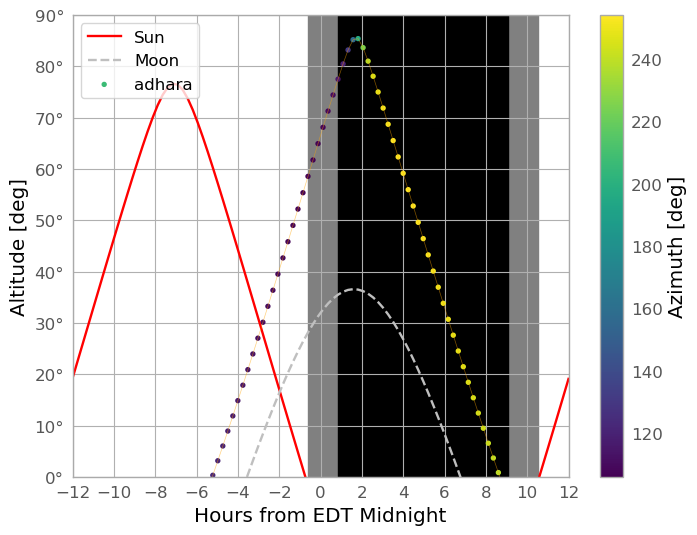

<module 'matplotlib.pyplot' from '/Users/macbook/miniconda3/envs/divtel/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [55]:
cta.navigation_plot(label=name)

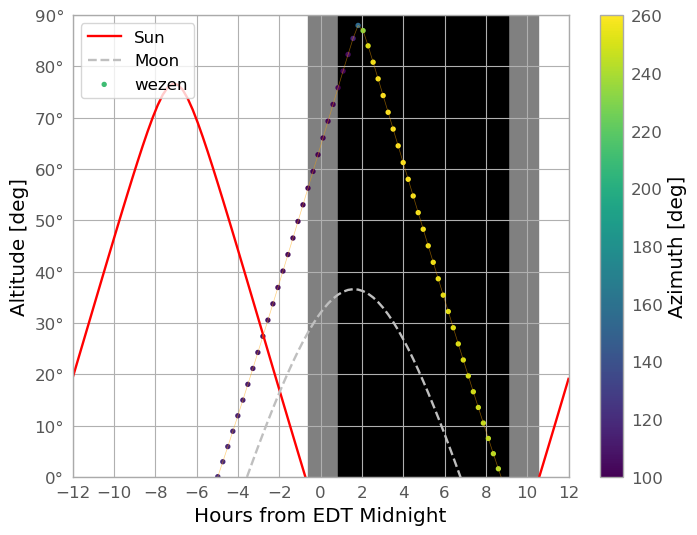

<module 'matplotlib.pyplot' from '/Users/macbook/miniconda3/envs/divtel/lib/python3.12/site-packages/matplotlib/pyplot.py'>

In [56]:
cta_2.navigation_plot(label=name_2)

In [87]:
# load the array and tell the code we want o point to the source previously set:
array = LoadConfig("/Users/macbook/divtel/1_telescope.txt", frame=cta, pointing2src=True)
array_2 = LoadConfig("/Users/macbook/divtel/2_telescope.txt", frame=cta, pointing2src=True)
# WARNING: at this stage we did not declare the divergence value, the code will set it to 0, the default value
# We can have a look at array.table and notice that all the telescopes are pointing to the same coordinates
array.table.units='deg'
array.table
array_2.table.units='deg'
array_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,-151.0,31.0,106.486,66.553,23.447,16.000,3.850,46.707,-0.113,-0.382,0.917,135.72
2,150.0,75.0,21.0,106.486,66.553,23.447,16.000,3.850,46.707,-0.113,-0.382,0.917,135.72


In [88]:
# The hFoV will at this stage be the one of parallel pointing (62.13)
array.hFoV()
array_2.hFoV()

2it [00:00,  6.12it/s]
2it [00:00,  6.69it/s]


(46.48899956677479, 2.0)

In [89]:
array.divergent_pointing(0.01)
array_2.divergent_pointing(0.01)

In [90]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,0.0,0.0,24.0,106.183,66.172,23.828,16.000,3.850,46.707,-0.113,-0.388,0.915,75.50
2,0.0,151.0,25.0,106.800,66.936,23.064,16.000,3.850,46.707,-0.113,-0.375,0.920,75.50


In [91]:
array.hFoV()
array_2.hFoV()

2it [00:00,  6.78it/s]
2it [00:00,  6.73it/s]


(57.38670299131353, 1.6224862888482632)

2it [00:00,  6.95it/s]
2it [00:00,  6.06it/s]


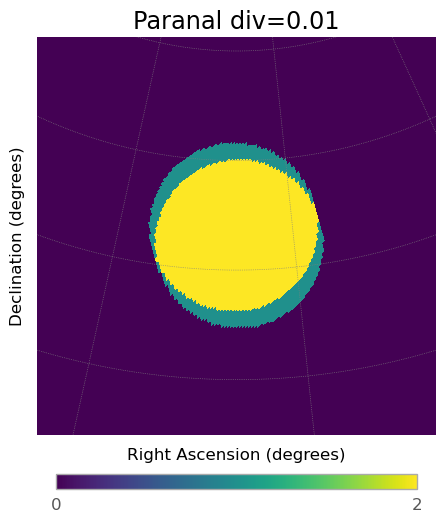

2it [00:00,  6.91it/s]
2it [00:00,  5.20it/s]


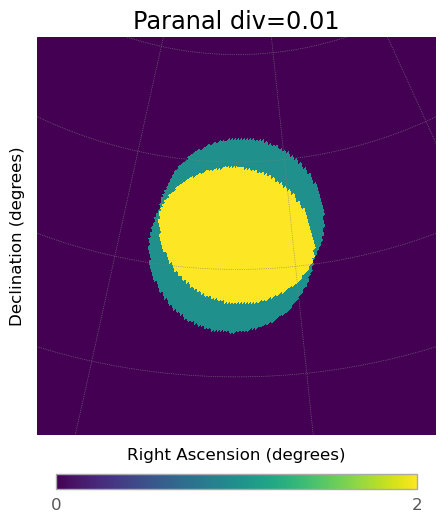

In [92]:
array.multiplicity_plot()
array_2.multiplicity_plot()

In [93]:
array.update_frame(time = '2024-02-20T00:00', verbose=True)
array.update_frame(delta_t = 5*u.min, verbose=True)
array_2.update_frame(time = '2024-02-20T00:00', verbose=True)
array_2.update_frame(delta_t = 5*u.min, verbose=True)

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:05:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:05:00.000




Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:25:00.000


2it [00:00,  6.93it/s]


(52.91484153792278, 1.7603469640644362)


2it [00:00,  7.07it/s]
2it [00:00,  6.14it/s]


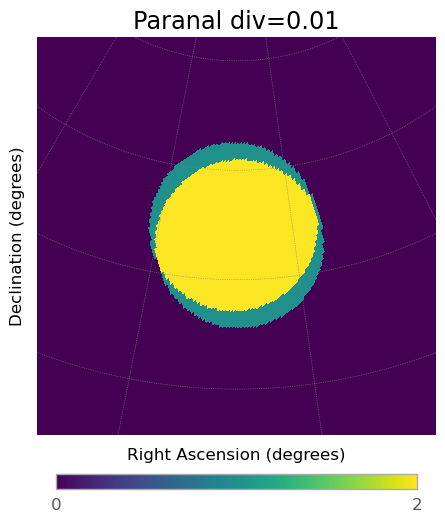



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:45:00.000


2it [00:00,  6.85it/s]


(52.91484153792278, 1.7558859975216852)


2it [00:00,  7.05it/s]
2it [00:00,  5.15it/s]


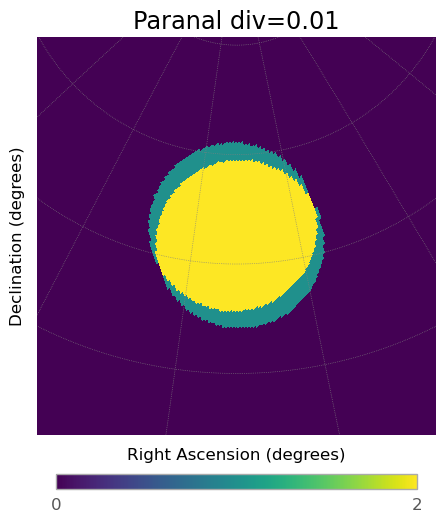



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:05:00.000


2it [00:00,  6.63it/s]


(53.04598116998702, 1.754264524103832)


2it [00:00,  6.85it/s]
2it [00:00,  6.31it/s]


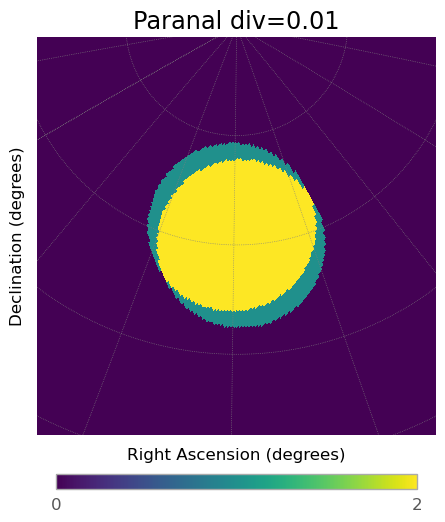



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:25:00.000


2it [00:00,  6.71it/s]


(53.28203250770267, 1.7482156042333252)


2it [00:00,  7.03it/s]
2it [00:00,  5.85it/s]


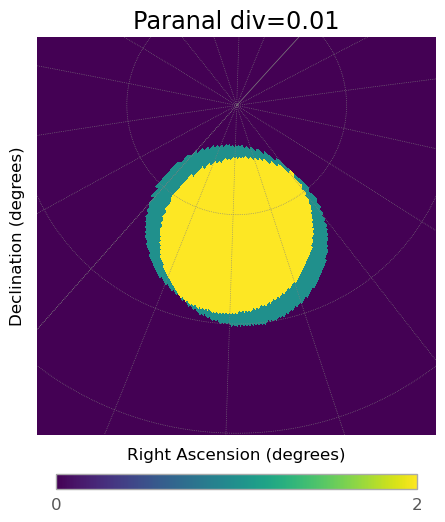



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:45:00.000


2it [00:00,  6.68it/s]


(53.16400683884485, 1.749629995066601)


2it [00:00,  6.34it/s]
2it [00:00,  5.84it/s]


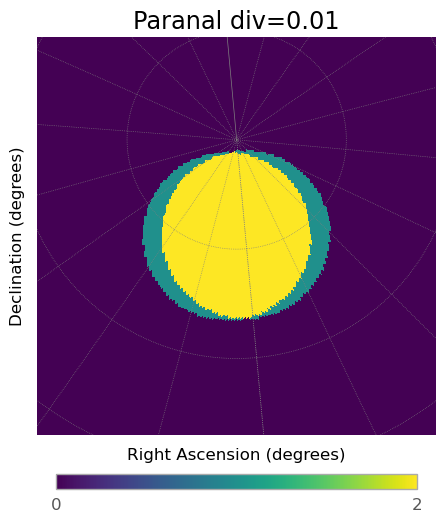



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:05:00.000


2it [00:00,  6.63it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  6.90it/s]
2it [00:00,  5.80it/s]


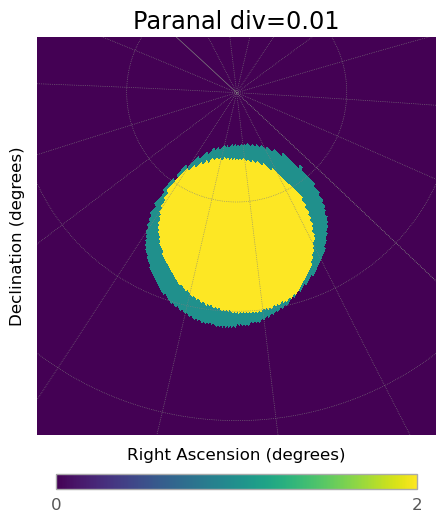

In [94]:
obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array.get_pointing_coord(icrs=True)
    array.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame=array.frame.altaz
    star_altaz=star.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        print(array.hFoV(return_multiplicity=True))
        array.multiplicity_plot()



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:25:00.000


2it [00:00,  6.17it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  6.96it/s]
2it [00:00,  6.32it/s]


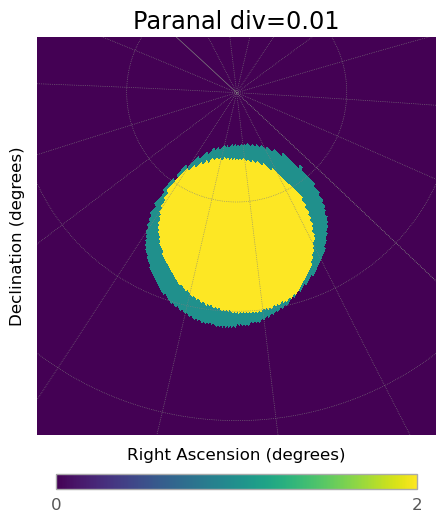



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T00:45:00.000


2it [00:00,  7.00it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  6.87it/s]
2it [00:00,  5.87it/s]


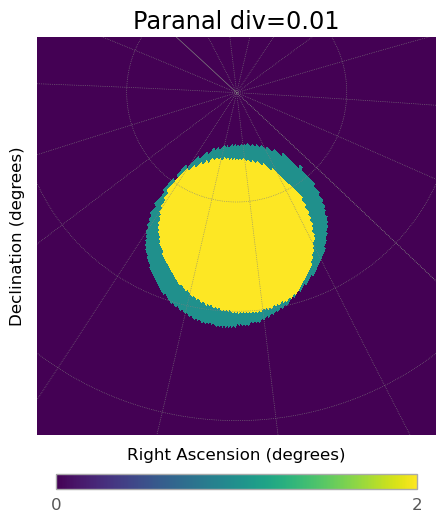



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:05:00.000


2it [00:00,  6.34it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  6.51it/s]
2it [00:00,  5.96it/s]


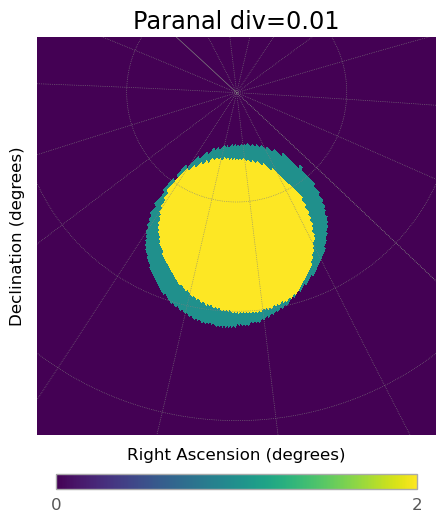



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:25:00.000


2it [00:00,  6.74it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  7.03it/s]
2it [00:00,  6.47it/s]


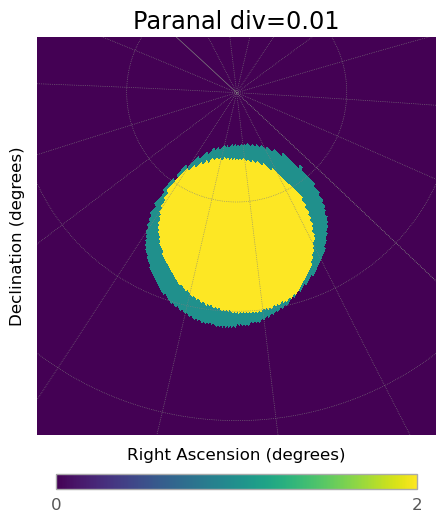



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T01:45:00.000


2it [00:00,  7.09it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  6.50it/s]
2it [00:00,  6.22it/s]


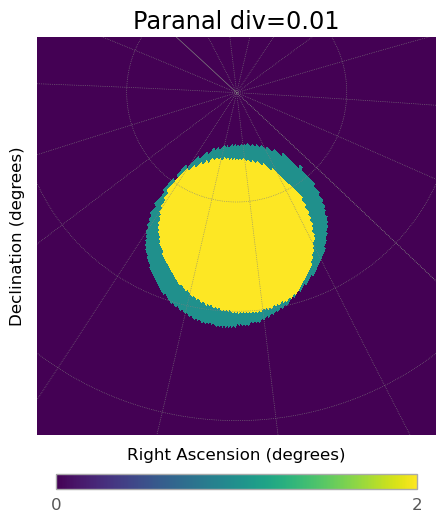



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:05:00.000


2it [00:00,  7.01it/s]


(53.16400683884485, 1.7498766650222004)


2it [00:00,  7.03it/s]
2it [00:00,  6.33it/s]


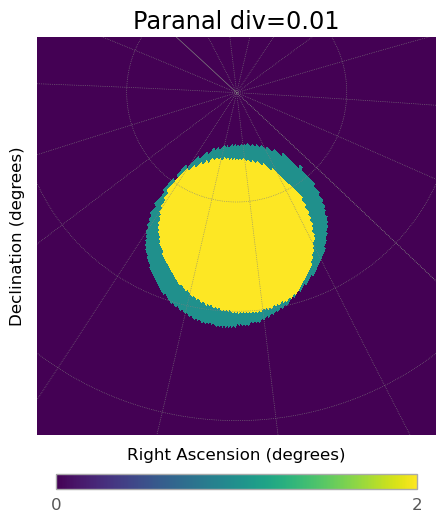

In [95]:
obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array_2.get_pointing_coord(icrs=True)
    array_2.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame=array_2.frame.altaz
    star_altaz_2=star_2.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz_2.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        print(array.hFoV(return_multiplicity=True))
        array.multiplicity_plot()



Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:20:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:20:00.000


2it [00:00,  6.20it/s]
2it [00:00,  6.78it/s]


(59.4062533251029, 3.129580573951435)


2it [00:00,  7.03it/s]
2it [00:00,  7.03it/s]
2it [00:00,  5.91it/s]


9.105586450164761


2it [00:00,  7.02it/s]


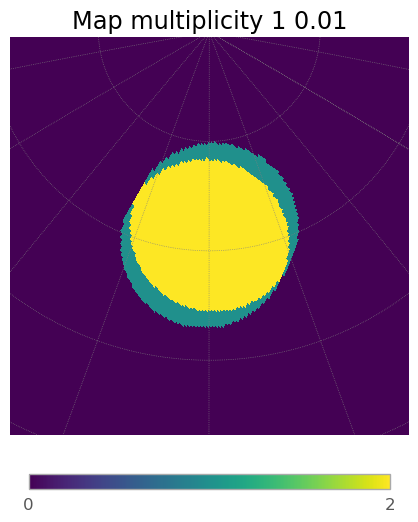

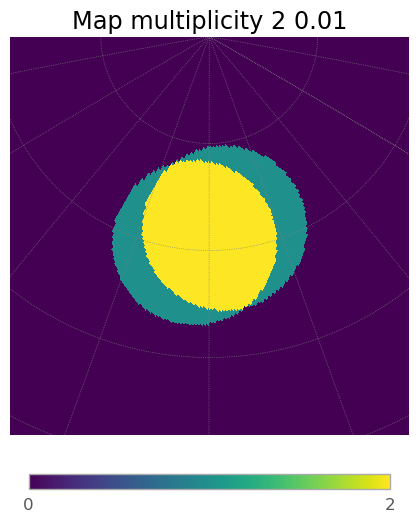

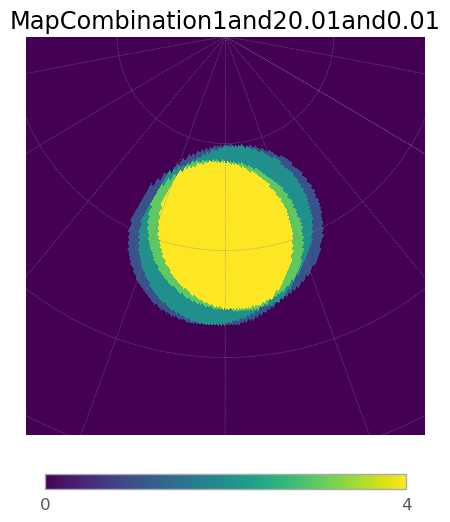

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:40:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T02:40:00.000


2it [00:00,  6.44it/s]
2it [00:00,  6.77it/s]


(59.4587091779286, 3.1338773709748566)


2it [00:00,  6.72it/s]
2it [00:00,  6.85it/s]
2it [00:00,  5.82it/s]


9.111174703812608


2it [00:00,  6.78it/s]


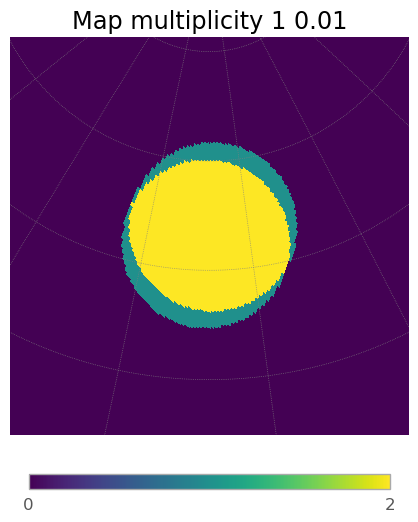

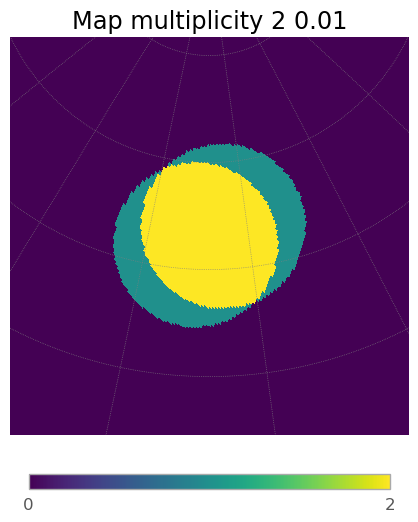

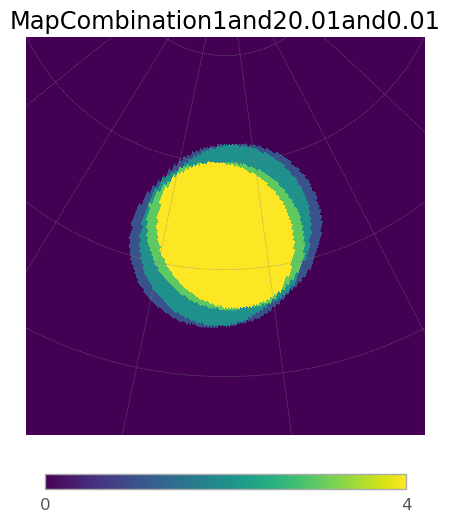

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:00:00.000


2it [00:00,  6.24it/s]
2it [00:00,  6.92it/s]


(59.248885766625804, 3.1423196104471005)


2it [00:00,  6.68it/s]
2it [00:00,  6.85it/s]
2it [00:00,  6.38it/s]


9.103552471119855


2it [00:00,  6.50it/s]


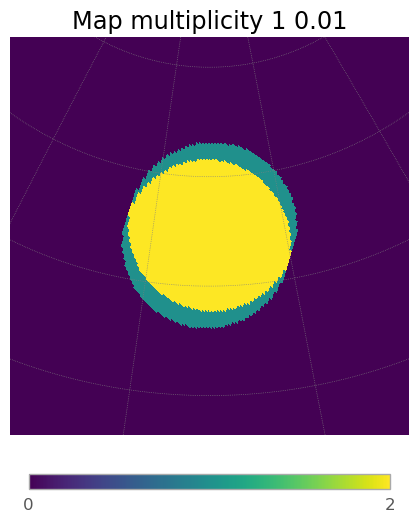

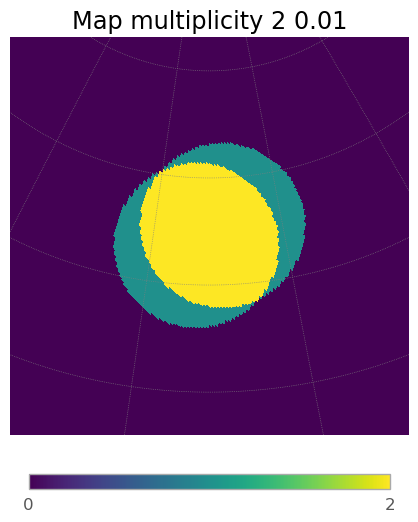

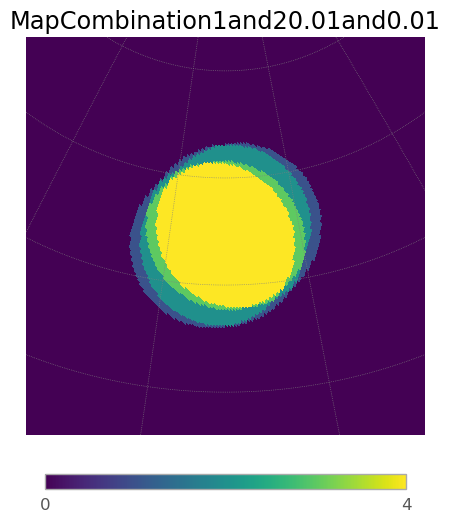

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:20:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:20:00.000


2it [00:00,  5.96it/s]
2it [00:00,  6.74it/s]


(59.130860097767986, 3.1512530494566424)


2it [00:00,  6.71it/s]
2it [00:00,  6.63it/s]
2it [00:00,  5.76it/s]


9.09897232803699


2it [00:00,  6.43it/s]


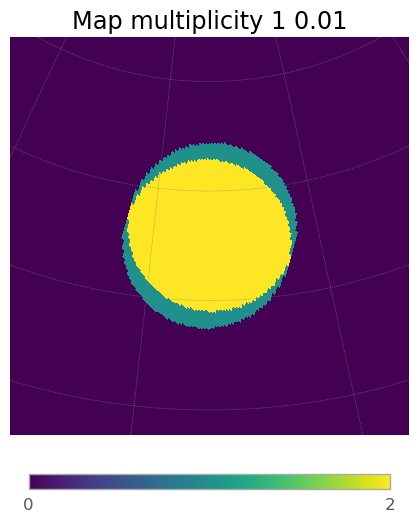

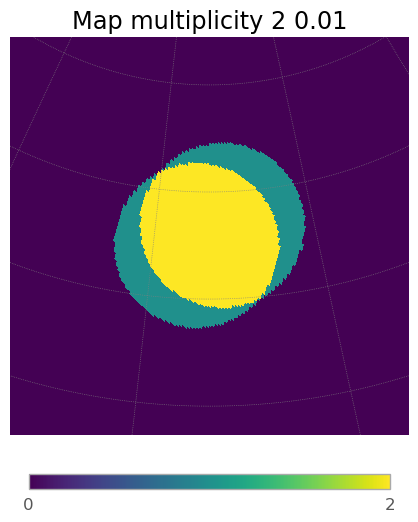

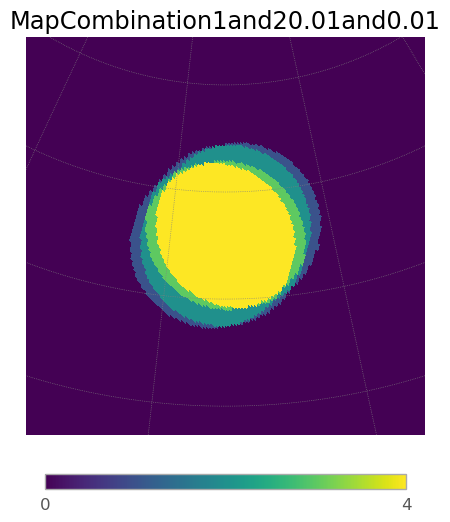

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:40:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T03:40:00.000


2it [00:00,  6.51it/s]
2it [00:00,  6.56it/s]


(59.06529028173586, 3.1560834813499112)


2it [00:00,  6.66it/s]
2it [00:00,  6.87it/s]
2it [00:00,  6.16it/s]


9.091837470881973


2it [00:00,  6.75it/s]


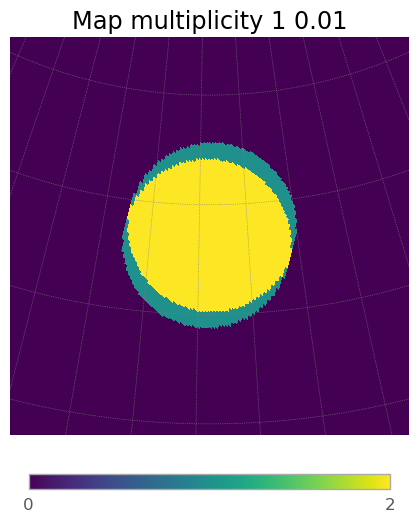

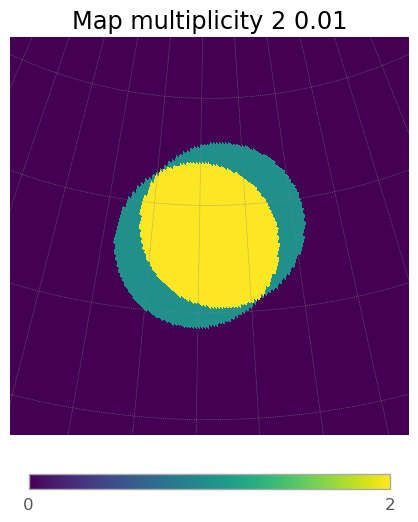

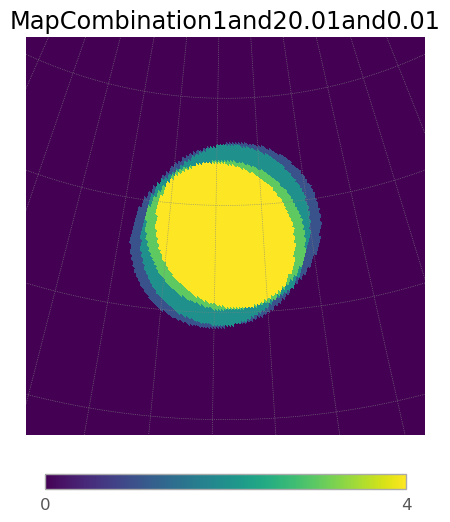

None


Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:00:00.000
Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-02-20T04:00:00.000


2it [00:00,  6.32it/s]
2it [00:00,  6.78it/s]


(58.789897054400946, 3.166629489181352)


2it [00:00,  6.15it/s]
2it [00:00,  6.46it/s]
2it [00:00,  6.16it/s]


9.0867335179526


2it [00:00,  6.69it/s]


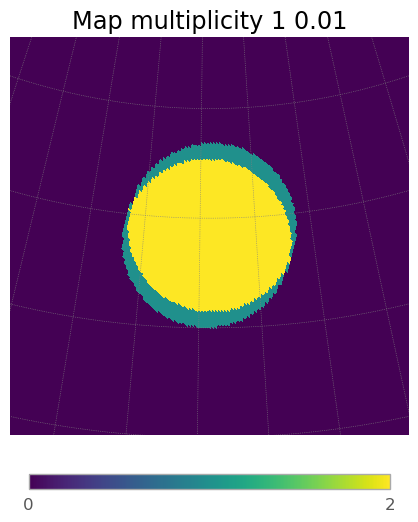

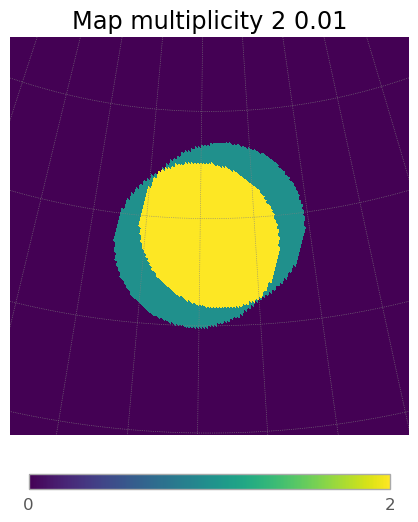

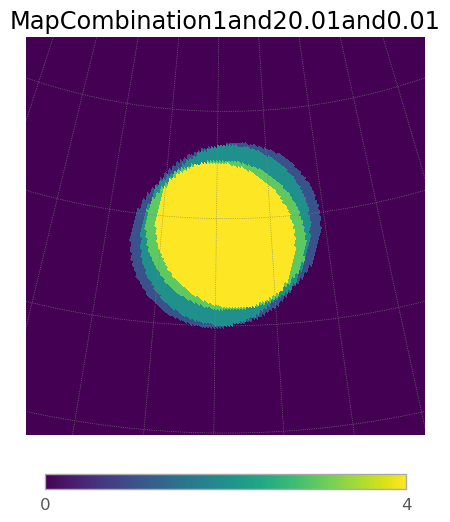

None


In [102]:
obs_h=2
for dt in range(int(obs_h*3)): 
    print('\n')
    initial_pointing_dir=array.get_pointing_coord(icrs=True)
    initial_pointing_dir_2=array_2.get_pointing_coord(icrs=True)
    array_2.update_frame(delta_t = 20*u.min, verbose=True)
    array.update_frame(delta_t = 20*u.min, verbose=True)
    new_frame_2=array_2.frame.altaz
    new_frame=array.frame.altaz
    star_altaz_2=star_2.transform_to(new_frame)
    star_altaz=star.transform_to(new_frame)
    #print(array.table[0])
    if star_altaz_2.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    if star_altaz.alt.deg < 24:
        print ("\n\tSorry, your star is not inside visibility limits")
    else:
        
        print(array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True))
        print(array.multiplicity_plot_2_div(array_2))





In [107]:
array.update_frame(time = '2024-02-20T00:00')
array_2.update_frame(time = '2024-02-20T00:00')
print(array.frame.t_obs)
fov_combination, m_ave_combination = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
hFoV_combination = [fov]
mAve_combination = [m_ave]
t = [0]
alt_1 = [array.pointing["alt"].value]
alt_2 = [array_2.pointing["alt"].value]
for i in range(44):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    array_2.update_frame(delta_t = 5*u.min)
    print(array.frame.t_obs)
    print(array_2.frame.t_obs)
    fov_combination, m_ave_combination = array.hFoV_for_2_arrays(array_2=array_2, return_multiplicity=True)
    hFoV_combination.append(fov_combination)
    mAve_combination.append(m_ave_combination)
    alt_1.append(array.pointing["alt"].value)
    alt_2.append(array_2.pointing["alt"].value)

2024-02-20T00:00:00.000


2it [00:00,  6.18it/s]
2it [00:00,  6.63it/s]


2024-02-20T00:05:00.000
2024-02-20T00:05:00.000


2it [00:00,  6.15it/s]
2it [00:00,  6.88it/s]


2024-02-20T00:10:00.000
2024-02-20T00:10:00.000


2it [00:00,  6.48it/s]
2it [00:00,  6.96it/s]


2024-02-20T00:15:00.000
2024-02-20T00:15:00.000


2it [00:00,  6.39it/s]
2it [00:00,  6.93it/s]


2024-02-20T00:20:00.000
2024-02-20T00:20:00.000


2it [00:00,  6.64it/s]
2it [00:00,  6.70it/s]


2024-02-20T00:25:00.000
2024-02-20T00:25:00.000


2it [00:00,  6.50it/s]
2it [00:00,  6.89it/s]


2024-02-20T00:30:00.000
2024-02-20T00:30:00.000


2it [00:00,  6.19it/s]
2it [00:00,  6.81it/s]


2024-02-20T00:35:00.000
2024-02-20T00:35:00.000


2it [00:00,  6.40it/s]
2it [00:00,  7.00it/s]


2024-02-20T00:40:00.000
2024-02-20T00:40:00.000


2it [00:00,  6.62it/s]
2it [00:00,  6.95it/s]


2024-02-20T00:45:00.000
2024-02-20T00:45:00.000


2it [00:00,  6.59it/s]
2it [00:00,  6.77it/s]


2024-02-20T00:50:00.000
2024-02-20T00:50:00.000


2it [00:00,  6.23it/s]
2it [00:00,  6.95it/s]


2024-02-20T00:55:00.000
2024-02-20T00:55:00.000


2it [00:00,  6.48it/s]
2it [00:00,  7.05it/s]


2024-02-20T01:00:00.000
2024-02-20T01:00:00.000


2it [00:00,  6.49it/s]
2it [00:00,  7.00it/s]


2024-02-20T01:05:00.000
2024-02-20T01:05:00.000


2it [00:00,  6.49it/s]
2it [00:00,  6.99it/s]


2024-02-20T01:10:00.000
2024-02-20T01:10:00.000


2it [00:00,  6.63it/s]
2it [00:00,  7.05it/s]


2024-02-20T01:15:00.000
2024-02-20T01:15:00.000


2it [00:00,  6.54it/s]
2it [00:00,  6.97it/s]


2024-02-20T01:20:00.000
2024-02-20T01:20:00.000


2it [00:00,  6.61it/s]
2it [00:00,  7.03it/s]


2024-02-20T01:25:00.000
2024-02-20T01:25:00.000


2it [00:00,  6.57it/s]
2it [00:00,  7.02it/s]


2024-02-20T01:30:00.000
2024-02-20T01:30:00.000


2it [00:00,  6.31it/s]
2it [00:00,  7.03it/s]


2024-02-20T01:35:00.000
2024-02-20T01:35:00.000


2it [00:00,  6.39it/s]
2it [00:00,  6.91it/s]


2024-02-20T01:40:00.000
2024-02-20T01:40:00.000


2it [00:00,  6.53it/s]
2it [00:00,  7.01it/s]


2024-02-20T01:45:00.000
2024-02-20T01:45:00.000


2it [00:00,  6.56it/s]
2it [00:00,  7.04it/s]


2024-02-20T01:50:00.000
2024-02-20T01:50:00.000


2it [00:00,  6.15it/s]
2it [00:00,  6.37it/s]


2024-02-20T01:55:00.000
2024-02-20T01:55:00.000


2it [00:00,  5.71it/s]
2it [00:00,  6.61it/s]


2024-02-20T02:00:00.000
2024-02-20T02:00:00.000


2it [00:00,  6.47it/s]
2it [00:00,  7.00it/s]


2024-02-20T02:05:00.000
2024-02-20T02:05:00.000


2it [00:00,  6.42it/s]
2it [00:00,  6.98it/s]


2024-02-20T02:10:00.000
2024-02-20T02:10:00.000


2it [00:00,  6.55it/s]
2it [00:00,  6.69it/s]


2024-02-20T02:15:00.000
2024-02-20T02:15:00.000


2it [00:00,  6.43it/s]
2it [00:00,  7.00it/s]


2024-02-20T02:20:00.000
2024-02-20T02:20:00.000


2it [00:00,  6.22it/s]
2it [00:00,  6.96it/s]


2024-02-20T02:25:00.000
2024-02-20T02:25:00.000


2it [00:00,  6.56it/s]
2it [00:00,  6.43it/s]


2024-02-20T02:30:00.000
2024-02-20T02:30:00.000


2it [00:00,  6.14it/s]
2it [00:00,  6.64it/s]


2024-02-20T02:35:00.000
2024-02-20T02:35:00.000


2it [00:00,  6.11it/s]
2it [00:00,  6.44it/s]


2024-02-20T02:40:00.000
2024-02-20T02:40:00.000


2it [00:00,  6.18it/s]
2it [00:00,  6.66it/s]


2024-02-20T02:45:00.000
2024-02-20T02:45:00.000


2it [00:00,  6.15it/s]
2it [00:00,  6.84it/s]


2024-02-20T02:50:00.000
2024-02-20T02:50:00.000


2it [00:00,  6.40it/s]
2it [00:00,  6.94it/s]


2024-02-20T02:55:00.000
2024-02-20T02:55:00.000


2it [00:00,  6.59it/s]
2it [00:00,  6.95it/s]


2024-02-20T03:00:00.000
2024-02-20T03:00:00.000


2it [00:00,  6.23it/s]
2it [00:00,  6.70it/s]


2024-02-20T03:05:00.000
2024-02-20T03:05:00.000


2it [00:00,  6.11it/s]
2it [00:00,  6.37it/s]


2024-02-20T03:10:00.000
2024-02-20T03:10:00.000


2it [00:00,  5.96it/s]
2it [00:00,  6.20it/s]


2024-02-20T03:15:00.000
2024-02-20T03:15:00.000


2it [00:00,  6.05it/s]
2it [00:00,  6.62it/s]


2024-02-20T03:20:00.000
2024-02-20T03:20:00.000


2it [00:00,  6.11it/s]
2it [00:00,  6.62it/s]


2024-02-20T03:25:00.000
2024-02-20T03:25:00.000


2it [00:00,  6.24it/s]
2it [00:00,  6.26it/s]


2024-02-20T03:30:00.000
2024-02-20T03:30:00.000


2it [00:00,  5.88it/s]
2it [00:00,  6.71it/s]


2024-02-20T03:35:00.000
2024-02-20T03:35:00.000


2it [00:00,  6.31it/s]
2it [00:00,  6.91it/s]


2024-02-20T03:40:00.000
2024-02-20T03:40:00.000


2it [00:00,  6.34it/s]
2it [00:00,  6.95it/s]


In [98]:
array_2.update_frame(time = '2024-02-20T00:00')
print(array_2.frame.t_obs)
fov_2, m_ave_2 = array_2.hFoV(return_multiplicity=True)
hFoV_2 = [fov_2]
mAve_2 = [m_ave_2]
t_2 = [0]
alt_2 = [array_2.pointing["alt"].value]
for i in range(24):
    t_2.append((i+1)*5)
    array_2.update_frame(delta_t = 5*u.min)
    print(array_2.frame.t_obs)
    fov_2, m_ave_2 = array_2.hFoV( return_multiplicity=True)
    hFoV_2.append(fov_2)
    mAve_2.append(m_ave_2)
    alt_2.append(array_2.pointing["alt"].value)

2024-02-20T00:00:00.000


2it [00:00,  6.62it/s]


2024-02-20T00:05:00.000


2it [00:00,  6.76it/s]


2024-02-20T00:10:00.000


2it [00:00,  6.66it/s]


2024-02-20T00:15:00.000


2it [00:00,  6.75it/s]


2024-02-20T00:20:00.000


2it [00:00,  6.60it/s]


2024-02-20T00:25:00.000


2it [00:00,  6.92it/s]


2024-02-20T00:30:00.000


2it [00:00,  6.52it/s]


2024-02-20T00:35:00.000


2it [00:00,  6.68it/s]


2024-02-20T00:40:00.000


2it [00:00,  6.72it/s]


2024-02-20T00:45:00.000


2it [00:00,  6.75it/s]


2024-02-20T00:50:00.000


2it [00:00,  6.81it/s]


2024-02-20T00:55:00.000


2it [00:00,  6.69it/s]


2024-02-20T01:00:00.000


2it [00:00,  7.00it/s]


2024-02-20T01:05:00.000


2it [00:00,  6.81it/s]


2024-02-20T01:10:00.000


2it [00:00,  6.83it/s]


2024-02-20T01:15:00.000


2it [00:00,  6.61it/s]


2024-02-20T01:20:00.000


2it [00:00,  6.83it/s]


2024-02-20T01:25:00.000


2it [00:00,  6.93it/s]


2024-02-20T01:30:00.000


2it [00:00,  6.83it/s]


2024-02-20T01:35:00.000


2it [00:00,  6.67it/s]


2024-02-20T01:40:00.000


2it [00:00,  6.73it/s]


2024-02-20T01:45:00.000


2it [00:00,  6.77it/s]


2024-02-20T01:50:00.000


2it [00:00,  6.65it/s]


2024-02-20T01:55:00.000


2it [00:00,  6.65it/s]


2024-02-20T02:00:00.000


2it [00:00,  6.80it/s]


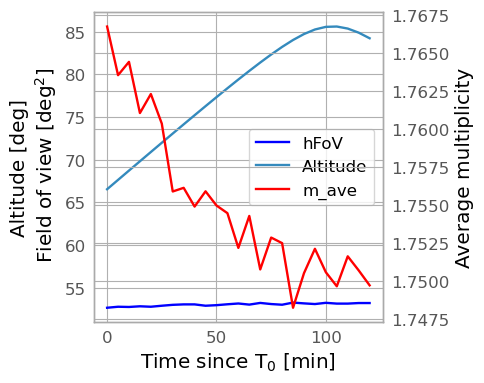

In [99]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)

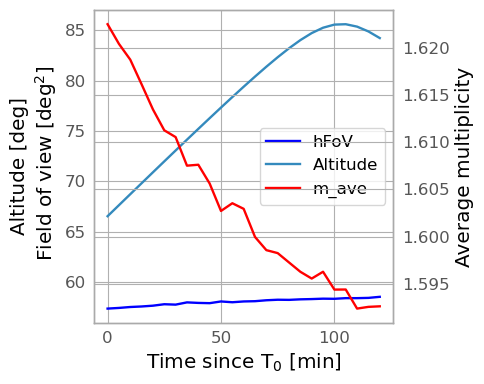

In [100]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV_2, color="b", label="hFoV")
p2 = ax.plot(t, alt_2, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve_2, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)

In [106]:
print( hFoV_combination)

[53.229576654876965, 58.606301569511004, 58.59318760630458, 58.68498534874955, 58.73744120157525, 58.90792272325877, 58.8685808336395, 59.09151820814871, 59.02594839211659, 58.99972046570374, 59.14397406097441, 59.18331595059368, 59.18331595059368, 59.20954387700653, 59.34068350907078, 59.39313936189647, 59.3537974722772, 59.48493710434145, 59.36691143548362, 59.445595214722175, 59.47182314113502, 59.432481251515746, 59.4587091779286, 59.55050692037357, 59.65541862602496]


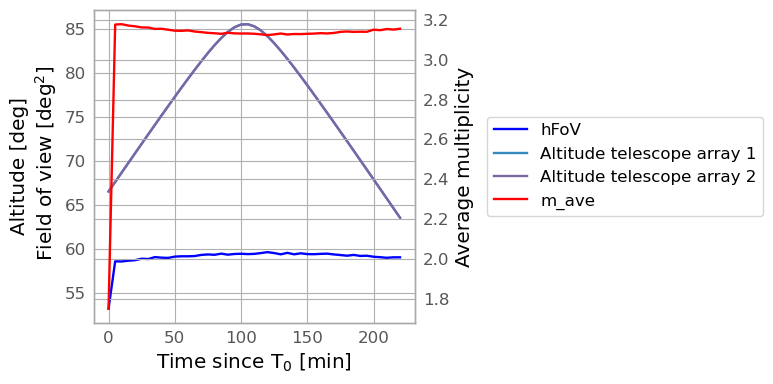

In [119]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV_combination, color="b", label="hFoV")
p2 = ax.plot(t, alt_1, label="Altitude telescope array 1")
p3 = ax.plot(t, alt_2, label="Altitude telescope array 2")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p4 = ax2.plot(t, mAve_combination, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3+p4
ax.legend(ps, [p.get_label() for p in ps], loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show(block=False)